In [1]:
print("Hypothesis:\n\n")
print('Analysing the sentiments of people regarding corona virus in California and New York. Is there any dependency on the actual \ncorona virus confirmed cases data which is comping from John Hopkins University.Is negativity increasing or decreasing with \nincrease of confirmed cases and comparison between California and New York on the same. ')

Hypothesis:


Analysing the sentiments of people regarding corona virus in California and New York. Is there any dependency on the actual 
corona virus confirmed cases data which is comping from John Hopkins University.Is negativity increasing or decreasing with 
increase of confirmed cases and comparison between California and New York on the same. 


In [2]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json
import pandas as pd
import matplotlib.pyplot as plt
from apscheduler.schedulers.blocking import BlockingScheduler
from textblob import TextBlob

In [3]:
access_token = "781068775844085760-Hn0YqDvtSwRsIkjf8Sn3Tds3UroOem3"
access_token_secret = "cUVSOaTRZFtK0GF8QgEjfEXUqBTqFbUhBBsktFLMtnaBl"
consumer_key = "CEljwcJ7Q72ebyc0nMdUh0L77"
consumer_secret = "8d8X7gkZEJLGTPUN0YV1XgcgKfyvXz4S6xmlnXM1FEa01XSVRw"
var = tweepy.OAuthHandler(consumer_key, consumer_secret)
var.set_access_token(access_token, access_token_secret)
api = tweepy.API(var,wait_on_rate_limit=True)

In [127]:
print("California:\n\n")
print("Figuring out the sentiments of people regarding corona virus pandemic. Using textBlob for finding if tweets coming from \nCalifornia are positive or negative. For this I am calculating total number of tweets collected and tweets which are showing positive and negative sentiments and removing all the neutral values.")

California:


Figuring out the sentiments of people regarding corona virus pandemic. Using textBlob for finding if tweets coming from 
California are positive or negative. For this I am calculating total number of tweets collected and tweets which are showing positive and negative sentiments and removing all the neutral values.


In [128]:
total_tweet = []
cnt_sentiment_cal = []
date=["2020-04-22","2020-04-23","2020-04-24","2020-04-25","2020-04-26","2020-04-27"]
query = ['covid-19 -filter:retweets']
max_tweets = 1000

count1 = 0
for d in date:
    try :


        print("Fetching data from api For California")
        tweets = tweepy.Cursor(api.search,q=query,language='en',geocode = "36.9915,119.7889,500mi",until=d).items(max_tweets)
        print("Data fetched")

        print("Begning to parse data for sentiment analysis")
        for tweet in tweets:   
            
                print(tweet.created_at)
   
                total_tweet.append({"text":tweet.text,"created_at":tweet.created_at.strftime("%x")})
                count1=count1+1
    
                if(count1 % 10 == 0):
                    print(str((count1/max_tweets)*100)+"% done" )
   
                analysis = TextBlob(tweet.text)
                if analysis.sentiment[0]>0:
                    cnt_sentiment_cal.append({"text":tweet.text,"Sentiment":"positive","created_at":tweet.created_at.strftime("%m-%d")})
        
                elif analysis.sentiment[0]< 0:
                     cnt_sentiment_cal.append({"text":tweet.text,"Sentiment":"negative","created_at":tweet.created_at.strftime("%m-%d")})

    except Exception as e: # work on python 2.x
    
        print("Error in fetching data"+str(e))

    finally:
        print("Completing process")

Fetching data from api For California
Data fetched
Begning to parse data for sentiment analysis
2020-04-21 23:59:19
2020-04-21 23:58:30
2020-04-21 23:57:51
2020-04-21 23:57:33
2020-04-21 23:56:58
2020-04-21 23:56:38
2020-04-21 23:56:33
2020-04-21 23:56:08
2020-04-21 23:55:54
2020-04-21 23:55:39
1.0% done
2020-04-21 23:55:30
2020-04-21 23:55:21
2020-04-21 23:54:36
2020-04-21 23:54:27
2020-04-21 23:53:58
2020-04-21 23:52:45
2020-04-21 23:51:31
2020-04-21 23:50:34
2020-04-21 23:49:02
2020-04-21 23:48:58
2.0% done
2020-04-21 23:48:13
2020-04-21 23:48:07
2020-04-21 23:47:57
2020-04-21 23:47:45
2020-04-21 23:47:44
2020-04-21 23:47:00
2020-04-21 23:46:37
2020-04-21 23:46:08
2020-04-21 23:45:25
2020-04-21 23:45:19
3.0% done
2020-04-21 23:45:07
2020-04-21 23:44:49
2020-04-21 23:42:47
2020-04-21 23:42:44
2020-04-21 23:41:09
2020-04-21 23:40:57
2020-04-21 23:40:36
2020-04-21 23:39:53
2020-04-21 23:39:40
2020-04-21 23:39:40
4.0% done
2020-04-21 23:39:33
2020-04-21 23:39:32
2020-04-21 23:38:50
2020

2020-04-21 19:52:30
2020-04-21 19:51:35
2020-04-21 19:50:42
39.0% done
2020-04-21 19:50:23
2020-04-21 19:50:23
2020-04-21 19:50:01
2020-04-21 19:49:46
2020-04-21 19:49:42
2020-04-21 19:49:17
2020-04-21 19:49:07
2020-04-21 19:48:36
2020-04-21 19:47:15
2020-04-21 19:47:13
40.0% done
2020-04-21 19:46:55
2020-04-21 19:46:50
2020-04-21 19:45:42
2020-04-21 19:45:29
2020-04-21 19:45:28
2020-04-21 19:44:55
2020-04-21 19:44:52
2020-04-21 19:44:02
2020-04-21 19:43:43
2020-04-21 19:43:42
41.0% done
2020-04-21 19:43:34
2020-04-21 19:42:15
2020-04-21 19:42:06
2020-04-21 19:41:29
2020-04-21 19:40:49
2020-04-21 19:40:35
2020-04-21 19:40:05
2020-04-21 19:39:32
2020-04-21 19:39:30
2020-04-21 19:39:18
42.0% done
2020-04-21 19:38:58
2020-04-21 19:38:33
2020-04-21 19:38:14
2020-04-21 19:37:31
2020-04-21 19:37:28
2020-04-21 19:36:53
2020-04-21 19:36:45
2020-04-21 19:35:38
2020-04-21 19:34:40
2020-04-21 19:33:11
43.0% done
2020-04-21 19:33:00
2020-04-21 19:31:32
2020-04-21 19:31:28
2020-04-21 19:31:05
2020-

2020-04-21 16:15:38
2020-04-21 16:15:18
2020-04-21 16:15:00
78.0% done
2020-04-21 16:14:47
2020-04-21 16:14:28
2020-04-21 16:14:22
2020-04-21 16:13:27
2020-04-21 16:12:47
2020-04-21 16:12:07
2020-04-21 16:12:00
2020-04-21 16:11:44
2020-04-21 16:11:36
2020-04-21 16:11:19
79.0% done
2020-04-21 16:11:06
2020-04-21 16:11:04
2020-04-21 16:10:17
2020-04-21 16:10:04
2020-04-21 16:09:56
2020-04-21 16:09:36
2020-04-21 16:09:01
2020-04-21 16:08:59
2020-04-21 16:08:52
2020-04-21 16:05:41
80.0% done
2020-04-21 16:04:50
2020-04-21 16:04:31
2020-04-21 16:04:01
2020-04-21 16:03:54
2020-04-21 16:03:52
2020-04-21 16:03:13
2020-04-21 16:02:54
2020-04-21 16:02:42
2020-04-21 16:02:40
2020-04-21 16:01:55
81.0% done
2020-04-21 16:01:25
2020-04-21 16:01:21
2020-04-21 16:01:16
2020-04-21 16:00:50
2020-04-21 16:00:36
2020-04-21 16:00:22
2020-04-21 15:59:35
2020-04-21 15:59:09
2020-04-21 15:59:03
2020-04-21 15:59:02
82.0% done
2020-04-21 15:58:58
2020-04-21 15:58:47
2020-04-21 15:58:42
2020-04-21 15:58:26
2020-

2020-04-22 22:13:11
2020-04-22 22:13:06
115.99999999999999% done
2020-04-22 22:12:17
2020-04-22 22:11:50
2020-04-22 22:11:16
2020-04-22 22:10:47
2020-04-22 22:10:13
2020-04-22 22:09:40
2020-04-22 22:09:24
2020-04-22 22:08:53
2020-04-22 22:08:34
2020-04-22 22:07:04
117.0% done
2020-04-22 22:05:02
2020-04-22 22:04:14
2020-04-22 22:02:50
2020-04-22 22:02:46
2020-04-22 22:00:57
2020-04-22 22:00:56
2020-04-22 22:00:44
2020-04-22 22:00:06
2020-04-22 21:59:56
2020-04-22 21:59:09
118.0% done
2020-04-22 21:58:49
2020-04-22 21:58:48
2020-04-22 21:57:40
2020-04-22 21:57:08
2020-04-22 21:57:06
2020-04-22 21:57:01
2020-04-22 21:56:44
2020-04-22 21:56:41
2020-04-22 21:56:26
2020-04-22 21:55:55
119.0% done
2020-04-22 21:54:50
2020-04-22 21:54:36
2020-04-22 21:54:34
2020-04-22 21:53:56
2020-04-22 21:52:50
2020-04-22 21:52:33
2020-04-22 21:52:18
2020-04-22 21:52:13
2020-04-22 21:52:04
2020-04-22 21:51:20
120.0% done
2020-04-22 21:51:19
2020-04-22 21:51:01
2020-04-22 21:50:57
2020-04-22 21:50:42
2020-04

2020-04-22 18:01:50
2020-04-22 18:01:13
2020-04-22 18:00:32
2020-04-22 18:00:09
2020-04-22 18:00:08
2020-04-22 18:00:07
155.0% done
2020-04-22 18:00:04
2020-04-22 18:00:03
2020-04-22 17:59:47
2020-04-22 17:59:36
2020-04-22 17:58:00
2020-04-22 17:57:53
2020-04-22 17:57:23
2020-04-22 17:57:00
2020-04-22 17:56:19
2020-04-22 17:56:17
156.0% done
2020-04-22 17:56:03
2020-04-22 17:55:58
2020-04-22 17:55:32
2020-04-22 17:52:45
2020-04-22 17:51:54
2020-04-22 17:51:03
2020-04-22 17:50:44
2020-04-22 17:50:26
2020-04-22 17:50:08
2020-04-22 17:49:44
157.0% done
2020-04-22 17:48:18
2020-04-22 17:47:48
2020-04-22 17:47:11
2020-04-22 17:46:28
2020-04-22 17:45:25
2020-04-22 17:45:14
2020-04-22 17:44:57
2020-04-22 17:43:50
2020-04-22 17:43:42
2020-04-22 17:43:37
158.0% done
2020-04-22 17:43:21
2020-04-22 17:43:15
2020-04-22 17:43:10
2020-04-22 17:42:57
2020-04-22 17:42:44
2020-04-22 17:42:24
2020-04-22 17:41:46
2020-04-22 17:41:29
2020-04-22 17:41:00
2020-04-22 17:40:37
159.0% done
2020-04-22 17:40:31


2020-04-22 14:45:43
2020-04-22 14:45:32
2020-04-22 14:45:21
2020-04-22 14:45:00
2020-04-22 14:44:50
2020-04-22 14:44:31
194.0% done
2020-04-22 14:44:25
2020-04-22 14:44:16
2020-04-22 14:41:59
2020-04-22 14:40:29
2020-04-22 14:40:20
2020-04-22 14:39:46
2020-04-22 14:37:46
2020-04-22 14:35:52
2020-04-22 14:35:52
2020-04-22 14:35:49
195.0% done
2020-04-22 14:35:46
2020-04-22 14:35:40
2020-04-22 14:35:29
2020-04-22 14:35:11
2020-04-22 14:34:00
2020-04-22 14:33:53
2020-04-22 14:33:36
2020-04-22 14:32:46
2020-04-22 14:31:47
2020-04-22 14:31:39
196.0% done
2020-04-22 14:31:05
2020-04-22 14:31:00
2020-04-22 14:30:49
2020-04-22 14:29:35
2020-04-22 14:29:06
2020-04-22 14:26:56
2020-04-22 14:26:50
2020-04-22 14:24:57
2020-04-22 14:24:31
2020-04-22 14:24:13
197.0% done
2020-04-22 14:22:50
2020-04-22 14:22:00
2020-04-22 14:21:38
2020-04-22 14:20:34
2020-04-22 14:20:15
2020-04-22 14:19:53
2020-04-22 14:19:16
2020-04-22 14:18:52
2020-04-22 14:18:19
2020-04-22 14:18:15
198.0% done
2020-04-22 14:17:52


2020-04-23 20:50:31
2020-04-23 20:49:59
2020-04-23 20:49:46
2020-04-23 20:46:31
2020-04-23 20:42:32
2020-04-23 20:41:56
2020-04-23 20:41:37
231.99999999999997% done
2020-04-23 20:41:18
2020-04-23 20:40:37
2020-04-23 20:39:42
2020-04-23 20:37:14
2020-04-23 20:35:27
2020-04-23 20:34:45
2020-04-23 20:32:46
2020-04-23 20:32:29
2020-04-23 20:32:21
2020-04-23 20:31:16
233.0% done
2020-04-23 20:31:16
2020-04-23 20:31:01
2020-04-23 20:30:05
2020-04-23 20:29:22
2020-04-23 20:28:58
2020-04-23 20:28:25
2020-04-23 20:27:01
2020-04-23 20:26:11
2020-04-23 20:25:45
2020-04-23 20:25:31
234.0% done
2020-04-23 20:25:26
2020-04-23 20:23:39
2020-04-23 20:19:34
2020-04-23 20:19:17
2020-04-23 20:18:11
2020-04-23 20:14:32
2020-04-23 20:13:34
2020-04-23 20:13:01
2020-04-23 20:12:49
2020-04-23 20:10:29
235.0% done
2020-04-23 20:09:54
2020-04-23 20:09:15
2020-04-23 20:08:27
2020-04-23 20:07:44
2020-04-23 20:06:48
2020-04-23 20:04:49
2020-04-23 19:59:55
2020-04-23 19:58:46
2020-04-23 19:56:38
2020-04-23 19:56:24

2020-04-23 15:49:59
2020-04-23 15:49:54
2020-04-23 15:49:40
2020-04-23 15:49:12
2020-04-23 15:49:12
2020-04-23 15:47:33
2020-04-23 15:47:32
271.0% done
2020-04-23 15:46:36
2020-04-23 15:46:26
2020-04-23 15:46:26
2020-04-23 15:46:12
2020-04-23 15:46:05
2020-04-23 15:45:59
2020-04-23 15:45:58
2020-04-23 15:45:54
2020-04-23 15:45:36
2020-04-23 15:45:05
272.0% done
2020-04-23 15:44:17
2020-04-23 15:43:52
2020-04-23 15:43:25
2020-04-23 15:43:14
2020-04-23 15:43:12
2020-04-23 15:40:57
2020-04-23 15:40:17
2020-04-23 15:40:16
2020-04-23 15:40:00
2020-04-23 15:39:39
273.0% done
2020-04-23 15:39:28
2020-04-23 15:39:28
2020-04-23 15:38:12
2020-04-23 15:37:45
2020-04-23 15:36:16
2020-04-23 15:36:13
2020-04-23 15:35:39
2020-04-23 15:34:46
2020-04-23 15:34:34
2020-04-23 15:34:32
274.0% done
2020-04-23 15:34:14
2020-04-23 15:33:28
2020-04-23 15:32:40
2020-04-23 15:32:11
2020-04-23 15:31:59
2020-04-23 15:31:54
2020-04-23 15:31:41
2020-04-23 15:31:17
2020-04-23 15:29:53
2020-04-23 15:29:33
275.0% done


2020-04-24 23:30:24
2020-04-24 23:30:09
2020-04-24 23:30:07
2020-04-24 23:29:58
2020-04-24 23:29:07
2020-04-24 23:28:51
2020-04-24 23:28:29
2020-04-24 23:28:28
2020-04-24 23:28:25
2020-04-24 23:28:15
310.0% done
2020-04-24 23:28:07
2020-04-24 23:27:36
2020-04-24 23:27:24
2020-04-24 23:27:14
2020-04-24 23:26:40
2020-04-24 23:26:34
2020-04-24 23:26:33
2020-04-24 23:26:26
2020-04-24 23:26:07
2020-04-24 23:25:48
311.0% done
2020-04-24 23:25:23
2020-04-24 23:25:09
2020-04-24 23:24:52
2020-04-24 23:24:27
2020-04-24 23:24:07
2020-04-24 23:23:29
2020-04-24 23:22:57
2020-04-24 23:22:46
2020-04-24 23:22:37
2020-04-24 23:22:35
312.0% done
2020-04-24 23:22:30
2020-04-24 23:21:38
2020-04-24 23:21:12
2020-04-24 23:20:59
2020-04-24 23:20:23
2020-04-24 23:20:02
2020-04-24 23:20:01
2020-04-24 23:19:19
2020-04-24 23:18:56
2020-04-24 23:18:49
313.0% done
2020-04-24 23:18:32
2020-04-24 23:18:31
2020-04-24 23:17:19
2020-04-24 23:17:17
2020-04-24 23:17:00
2020-04-24 23:16:40
2020-04-24 23:16:21
2020-04-24 2

2020-04-24 22:14:04
2020-04-24 22:13:54
2020-04-24 22:13:50
2020-04-24 22:13:37
2020-04-24 22:13:20
2020-04-24 22:13:12
2020-04-24 22:13:08
2020-04-24 22:13:03
2020-04-24 22:13:02
2020-04-24 22:12:50
349.0% done
2020-04-24 22:12:28
2020-04-24 22:12:24
2020-04-24 22:12:09
2020-04-24 22:12:03
2020-04-24 22:11:58
2020-04-24 22:11:54
2020-04-24 22:11:33
2020-04-24 22:11:32
2020-04-24 22:11:28
2020-04-24 22:11:20
350.0% done
2020-04-24 22:11:19
2020-04-24 22:11:14
2020-04-24 22:11:11
2020-04-24 22:11:10
2020-04-24 22:10:59
2020-04-24 22:10:58
2020-04-24 22:10:52
2020-04-24 22:10:28
2020-04-24 22:10:19
2020-04-24 22:10:05
351.0% done
2020-04-24 22:10:04
2020-04-24 22:10:04
2020-04-24 22:09:56
2020-04-24 22:09:45
2020-04-24 22:09:44
2020-04-24 22:09:42
2020-04-24 22:09:38
2020-04-24 22:09:26
2020-04-24 22:08:58
2020-04-24 22:08:40
352.0% done
2020-04-24 22:08:37
2020-04-24 22:08:29
2020-04-24 22:08:29
2020-04-24 22:08:27
2020-04-24 22:08:18
2020-04-24 22:08:09
2020-04-24 22:08:07
2020-04-24 2

2020-04-24 21:29:24
2020-04-24 21:29:11
2020-04-24 21:29:08
2020-04-24 21:29:04
2020-04-24 21:28:57
2020-04-24 21:28:54
2020-04-24 21:28:53
2020-04-24 21:28:53
2020-04-24 21:28:33
2020-04-24 21:28:23
388.0% done
2020-04-24 21:28:17
2020-04-24 21:28:14
2020-04-24 21:28:04
2020-04-24 21:28:01
2020-04-24 21:27:54
2020-04-24 21:27:51
2020-04-24 21:27:38
2020-04-24 21:27:36
2020-04-24 21:27:21
2020-04-24 21:27:11
389.0% done
2020-04-24 21:27:08
2020-04-24 21:27:06
2020-04-24 21:27:06
2020-04-24 21:27:01
2020-04-24 21:27:00
2020-04-24 21:26:56
2020-04-24 21:26:47
2020-04-24 21:26:42
2020-04-24 21:26:42
2020-04-24 21:26:09
390.0% done
2020-04-24 21:26:07
2020-04-24 21:25:55
2020-04-24 21:25:39
2020-04-24 21:25:37
2020-04-24 21:25:35
2020-04-24 21:25:21
2020-04-24 21:25:11
2020-04-24 21:25:08
2020-04-24 21:25:07
2020-04-24 21:25:07
391.0% done
2020-04-24 21:24:31
2020-04-24 21:24:26
2020-04-24 21:24:12
2020-04-24 21:24:10
2020-04-24 21:24:05
2020-04-24 21:24:03
2020-04-24 21:24:01
2020-04-24 2

2020-04-26 23:43:58
2020-04-26 23:42:05
2020-04-26 23:42:01
2020-04-26 23:40:38
2020-04-26 23:40:37
423.00000000000006% done
2020-04-26 23:40:29
2020-04-26 23:40:06
2020-04-26 23:40:01
2020-04-26 23:38:51
2020-04-26 23:38:22
2020-04-26 23:37:40
2020-04-26 23:37:18
2020-04-26 23:36:50
2020-04-26 23:36:50
2020-04-26 23:36:48
424.0% done
2020-04-26 23:36:33
2020-04-26 23:35:21
2020-04-26 23:33:18
2020-04-26 23:32:18
2020-04-26 23:31:36
2020-04-26 23:29:21
2020-04-26 23:28:27
2020-04-26 23:28:26
2020-04-26 23:28:00
2020-04-26 23:27:34
425.0% done
2020-04-26 23:27:21
2020-04-26 23:27:15
2020-04-26 23:27:10
2020-04-26 23:26:58
2020-04-26 23:26:44
2020-04-26 23:26:11
2020-04-26 23:25:54
2020-04-26 23:25:43
2020-04-26 23:24:17
2020-04-26 23:23:38
426.0% done
2020-04-26 23:23:26
2020-04-26 23:23:24
2020-04-26 23:22:49
2020-04-26 23:22:41
2020-04-26 23:22:17
2020-04-26 23:21:42
2020-04-26 23:21:28
2020-04-26 23:21:24
2020-04-26 23:21:12
2020-04-26 23:21:06
426.99999999999994% done
2020-04-26 23:

2020-04-26 19:44:32
2020-04-26 19:42:05
2020-04-26 19:40:33
2020-04-26 19:39:37
2020-04-26 19:38:22
462.0% done
2020-04-26 19:38:12
2020-04-26 19:37:18
2020-04-26 19:37:09
2020-04-26 19:36:21
2020-04-26 19:36:10
2020-04-26 19:36:02
2020-04-26 19:32:18
2020-04-26 19:31:10
2020-04-26 19:30:35
2020-04-26 19:30:02
463.0% done
2020-04-26 19:29:42
2020-04-26 19:29:41
2020-04-26 19:29:15
2020-04-26 19:29:12
2020-04-26 19:29:00
2020-04-26 19:27:55
2020-04-26 19:24:19
2020-04-26 19:22:41
2020-04-26 19:22:24
2020-04-26 19:22:10
463.99999999999994% done
2020-04-26 19:21:27
2020-04-26 19:21:11
2020-04-26 19:20:02
2020-04-26 19:19:39
2020-04-26 19:19:33
2020-04-26 19:19:20
2020-04-26 19:18:45
2020-04-26 19:18:23
2020-04-26 19:18:23
2020-04-26 19:18:04
465.00000000000006% done
2020-04-26 19:17:48
2020-04-26 19:17:38
2020-04-26 19:17:31
2020-04-26 19:17:11
2020-04-26 19:16:36
2020-04-26 19:15:53
2020-04-26 19:15:53
2020-04-26 19:15:39
2020-04-26 19:14:45
2020-04-26 19:14:17
466.0% done
2020-04-26 19:

2020-04-26 15:53:20
2020-04-26 15:51:20
2020-04-26 15:51:01
2020-04-26 15:50:40
2020-04-26 15:50:26
2020-04-26 15:50:15
501.0% done
2020-04-26 15:49:52
2020-04-26 15:48:46
2020-04-26 15:48:18
2020-04-26 15:47:46
2020-04-26 15:47:30
2020-04-26 15:45:53
2020-04-26 15:45:25
2020-04-26 15:45:17
2020-04-26 15:44:05
2020-04-26 15:43:49
501.99999999999994% done
2020-04-26 15:42:38
2020-04-26 15:40:09
2020-04-26 15:39:42
2020-04-26 15:38:33
2020-04-26 15:38:14
2020-04-26 15:38:10
2020-04-26 15:38:04
2020-04-26 15:38:03
2020-04-26 15:37:52
2020-04-26 15:37:18
503.0% done
2020-04-26 15:36:17
2020-04-26 15:36:04
2020-04-26 15:35:41
2020-04-26 15:34:05
2020-04-26 15:33:11
2020-04-26 15:32:44
2020-04-26 15:32:31
2020-04-26 15:32:01
2020-04-26 15:31:58
2020-04-26 15:31:04
504.0% done
2020-04-26 15:31:00
2020-04-26 15:30:38
2020-04-26 15:30:13
2020-04-26 15:30:01
2020-04-26 15:28:49
2020-04-26 15:28:40
2020-04-26 15:28:24
2020-04-26 15:28:00
2020-04-26 15:27:45
2020-04-26 15:27:29
505.0% done
2020-04

In [129]:
print("Total number of tweets being collected from California: "+ str(count1))
print("Total number of sentiment tweets which are negative and positive :"+ str(len(cnt_sentiment_cal)))

Total number of tweets being collected from California: 5195
Total number of sentiment tweets which are negative and positive :2131


In [130]:
print('Using pandas to clean the tweets collected and to create data frame. ')

Using pandas to clean the tweets collected and to create data frame. 


In [131]:
data_pd=pd.DataFrame(cnt_sentiment_cal)
data_pd=data_pd[["text", "Sentiment","created_at"]]
data_pd.head(5)

,text,Sentiment,created_at
0,RT @thouse_opinions: Protesters placed fake bo...,negative,04-21
1,RT @CGTNOfficial: While Trump says Beijing sho...,positive,04-21
2,RT @ChinaDaily: How did China manage to contai...,positive,04-21
3,RT @CGTNOfficial: At least 710 crew members fr...,negative,04-21
4,RT @TheLancet: NEW Correspondence—Ethnicity an...,positive,04-21


In [132]:
data_pd.to_csv("california_tweet_data2.csv") #Storing data to csv

In [133]:
data_pd = pd.read_csv("california_tweet_data2.csv") #Read file
data_pd.head(10) #Reading data from csv

,Unnamed: 0,text,Sentiment,created_at
0,0,RT @thouse_opinions: Protesters placed fake bo...,negative,04-21
1,1,RT @CGTNOfficial: While Trump says Beijing sho...,positive,04-21
2,2,RT @ChinaDaily: How did China manage to contai...,positive,04-21
3,3,RT @CGTNOfficial: At least 710 crew members fr...,negative,04-21
4,4,RT @TheLancet: NEW Correspondence—Ethnicity an...,positive,04-21
5,5,RT @ChinaDaily: How does #China manage to larg...,positive,04-21
6,6,RT @ChinaDaily: How does #China manage to larg...,positive,04-21
7,7,RT @ChinaDaily: How does #China manage to larg...,positive,04-21
8,8,RT @ChinaDaily: #EverydayHero China's National...,positive,04-21
9,9,RT @CGTNOfficial: Take a look at a young stude...,positive,04-21


In [134]:
print('Total number of positive tweets and total number of negative tweets from the sentiment data in csv.')
sentiment_data=cnt_sentiment_cal
grouped_data = pd.DataFrame(data_pd.groupby(["Sentiment"])["created_at"].count()).reset_index()
grouped_data.rename(columns = {'created_at': 'Count'}, inplace = True)
grouped_data.head()

Total number of positive tweets and total number of negative tweets from the sentiment data in csv.


,Sentiment,Count
0,negative,559
1,positive,1572


Bar graph to show positive and negative tweets collected in California to record the sentiment of people towards the corona virus pandemic


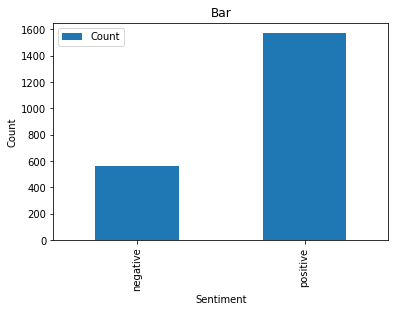

In [135]:
print("Bar graph to show positive and negative tweets collected in California to record the sentiment of people towards the corona virus pandemic")
#Filter the DataFrame down only to those columns to chart
bar_plot_data = grouped_data[["Sentiment","Count"]]
bar_plot_data = bar_plot_data.set_index("Sentiment")

# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot_data.plot(kind="bar")
plt.title("Bar")
plt.ylabel("Count")
plt.xlabel("Sentiment")

plt.savefig("Bar_Count_Positive_Negative_california.png")
plt.show()

Pie chart to show positive and negative tweets collected from California: 
 

Percentage of Negative tweets: 26.231816048803378 %
Percentage of Positive tweets: 73.76818395119662 %

 
Pie Chart :


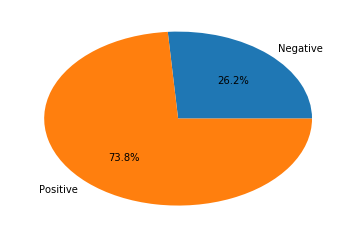

In [136]:
print('Pie chart to show positive and negative tweets collected from California: \n \n')
sentiment_count = (data_pd.groupby(["Sentiment"])["created_at"].count()).tolist()
labels = ["Negative", "Positive"]
colors = [ "blue","orange"]
plt.pie(sentiment_count,autopct="%1.1f%%",labels=labels)

labels = ['Orange - positive', 'Blue negative']


positive_percent=(sentiment_count[0]*100)/(sentiment_count[0]+sentiment_count[1])

print("Percentage of Negative tweets: "+ str(positive_percent) +" %")
print("Percentage of Positive tweets: "+str((sentiment_count[1]*100)/(sentiment_count[0]+sentiment_count[1]))+(" %"))
print("\n \nPie Chart :")
plt.savefig("PieChart_Positive_Negative_california.png")

In [137]:
print("Analysis 1: To show how people are reacting to covid-29 tweets \n")
print('More people are positively talking about corona vieus. Pie graph and Bar graph shows how. ')

Analysis 1: To show how people are reacting to covid-29 tweets 

More people are positively talking about corona vieus. Pie graph and Bar graph shows how. 


In [138]:
print("Total number of people positive and negative in California based on dates.\n \n")
twitter_date = pd.DataFrame(data_pd.groupby(["created_at","Sentiment"]).count()).reset_index()
twitter_date.rename(columns = {'text': 'Count'}, inplace = True)
twitter_date.sort_values(by=['created_at'])

twitter_date.head()

Total number of people positive and negative in California based on dates.
 



,created_at,Sentiment,Unnamed: 0,Count
0,04-21,negative,82,82
1,04-21,positive,334,334
2,04-22,negative,167,167
3,04-22,positive,429,429
4,04-23,negative,135,135


In [139]:
print("Using group by to seprate positive and negative people based on dates:")
df1, df2 = [a for _, a in twitter_date.groupby(twitter_date['Sentiment'] != 'negative')]
df1.reset_index()
df1.head()


Using group by to seprate positive and negative people based on dates:


,created_at,Sentiment,Unnamed: 0,Count
0,04-21,negative,82,82
2,04-22,negative,167,167
4,04-23,negative,135,135
6,04-24,negative,12,12
8,04-25,negative,4,4


In [140]:
df2.head()

,created_at,Sentiment,Unnamed: 0,Count
1,04-21,positive,334,334
3,04-22,positive,429,429
5,04-23,positive,308,308
7,04-24,positive,147,147
9,04-25,positive,43,43


In [141]:
total_data_pd=pd.DataFrame(total_tweet)
total_data_pd=data_pd[["text","created_at"]]
total_data_pd.head(10)
total_tweet_df = pd.DataFrame(total_data_pd.groupby(["created_at"]).count()).reset_index()
total_tweet_df.rename(columns = {'text': 'Count'}, inplace = True)
total_tweet_df.sort_values(by=['created_at'])

total_tweet_df.head()


,created_at,Count
0,04-21,416
1,04-22,596
2,04-23,443
3,04-24,159
4,04-25,47


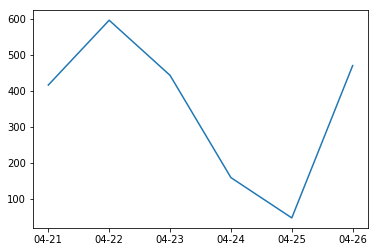

In [142]:
import numpy as np
y=total_tweet_df['Count'].tolist()
x = total_tweet_df['created_at'].tolist()
plt.plot(x,y)
plt.show()

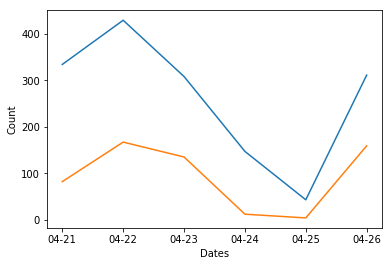

In [143]:
y2=df1['Count'].tolist()
y1=df2['Count'].tolist()
x = df1['created_at'].tolist()

# multiple line plot
plt.plot(x,y1)
plt.plot(x,y2)
plt.ylabel("Count")
plt.xlabel("Dates")
plt.savefig("Flow_basedondates_Positive_Negative_california.png")